## Lab 4 - Analyzing Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to work with datasets in python using pandas library for data analysis using the provided data. 
For datasets like this it becomes hard to use Excel because of its size. If you learn how to work with pandas you'll be able to do basic analytical research much faster than in Excel.
To execute code IPython notebook click on the Cell and press Shift-Enter.
If you don't have any experience with Jupyter notebooks, please look at this tutorial: https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb

### Main objectives
After successful completion of the lab work students will be able to:
-	Analyze large datasets that don't work well in Excel using IPython notebook and pandas library
-   Find outliers and remove them in the datasets
-	Calculate different statistics on data fields


### Tasks
-	Calculate median and mean sell and rent prices in St. Petersburg
-   Find outliers: too cheap or too expensive apartments which seem to be a wrong data. Remove them from the dataset.
-	Find houses with the most cheapest and most expensive prices per square meter.
-   Analyze how many rent offers have the commission and what is the most popular commission



In [1]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import pandas as pd
import numpy as np
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
# import new library seaborn, you could install it via pip
import seaborn as sns
import plotly
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
# let's look what is inside our data file to understand how we can export it. 
# We can use linux command "head" which shows the first row in the file. 
# In IPython notebooks you can execute linux commands using "!" prefixe before the command name. 
# This mechanism is called "IPython magic"
!head -n 3 data/spb.real.estate.archive.2018.tsv

head: cannot open 'data/spb.real.estate.archive.2018.tsv' for reading: No such file or directory


In [4]:
# if you don't remember what linux command does (i.e. what is -n), you can always look for help
!head --help

Usage: head [OPTION]... [FILE]...
Print the first 10 lines of each FILE to standard output.
With more than one FILE, precede each with a header giving the file name.

With no FILE, or when FILE is -, read standard input.

Mandatory arguments to long options are mandatory for short options too.
  -c, --bytes=[-]NUM       print the first NUM bytes of each file;
                             with the leading '-', print all but the last
                             NUM bytes of each file
  -n, --lines=[-]NUM       print the first NUM lines instead of the first 10;
                             with the leading '-', print all but the last
                             NUM lines of each file
  -q, --quiet, --silent    never print headers giving file names
  -v, --verbose            always print headers giving file names
  -z, --zero-terminated    line delimiter is NUL, not newline
      --help     display this help and exit
      --version  output version information and exit

NUM may have a mu

In [5]:
!ls

 catboost_info
 HW1.ipynb
 HW2.ipynb
 lab1_1_EDA_real_estate_data.ipynb
'lab2_building_model_example (1).ipynb'
 lab2_building_model.ipynb
'Lecture2 (1).ipynb'
'Lecture 3.ipynb'
 model.pkl
 modelxgb.pkl
 scaler_x.pkl
 scaler_y.pkl
 sells_result.csv
 spb.real.estate.archive.2018.tsv
 spb.real.estate.archive.sample5000.tsv
 telecom_churn.csv
 telecom_tree.dot
 telecom_tree.png
 telecom_tree_second.dot
 telecom_tree_second.png


In [6]:
# we see that it's tab separated file, we can load it with pd.read_table method
# load our dataset and see which data it contains.
# HINT: you can type 'Tab' after starting typing the filename and IPython will automatically fill it for you
# After this command a new variable will be created (spb_df) containing pandas dataframe with data in our file
# You can think of dataframe structure as an analogue of Excel sheet
spb_df = pd.read_table('spb.real.estate.archive.2018.tsv')

In [7]:
# HINT: if you don't know which arguments any function takes or what it does you can check the documenation right 
# in the notebook just by adding "?" after the function name. Let's look at pandas read_table function:
pd.read_table?

In [8]:
# let's check how much data in terms of rows we have where each row represent 
# one offer from Yandex.Realty
len(spb_df)

429187

In [10]:
spb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429187 entries, 0 to 429186
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   offer_id              429187 non-null  int64  
 1   first_day_exposition  429187 non-null  object 
 2   last_day_exposition   429187 non-null  object 
 3   last_price            429187 non-null  float64
 4   floor                 429187 non-null  int64  
 5   open_plan             429187 non-null  bool   
 6   rooms                 429187 non-null  int64  
 7   studio                429187 non-null  bool   
 8   area                  429187 non-null  float64
 9   kitchen_area          341591 non-null  float64
 10  living_area           364544 non-null  float64
 11  agent_fee             149229 non-null  float64
 12  renovation            295659 non-null  float64
 13  offer_type            429187 non-null  int64  
 14  category_type         429187 non-null  int64  
 15  

In [9]:
# let's look at random sample of size 10 of the loaded dataset to understand what's inside
spb_df.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
143331,3375339907026548844,2017-02-27T00:00:00+03:00,2017-02-28T00:00:00+03:00,25000.0,9,False,2,False,52.0,9.0,39.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Большевиков, 38к1",5383306122746738401
70994,3031790358823347201,2016-06-21T00:00:00+03:00,2016-07-03T00:00:00+03:00,15000.0,1,False,1,False,42.0,13.0,20.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, Московское шоссе, 246",4169477236027209913
110763,5476793700016416000,2016-11-24T00:00:00+03:00,2018-02-07T00:00:00+03:00,2880000.0,14,False,1,False,36.0,10.0,17.0,NaN,8.0,1,2,"Россия, Ленинградская область, Всеволожский район, посёлок Мурино, Охтинская аллея, 14",2600536765669241623
388362,1880810332649890817,2018-07-01T00:00:00+03:00,2018-07-10T00:00:00+03:00,4249000.0,3,False,2,False,57.5,8.7,32.1,NaN,NaN,1,2,"Россия, Санкт-Петербург, Комендантский проспект, 57к2",2153540495534779419
411718,2135596500245175720,2018-07-30T00:00:00+03:00,2018-08-20T00:00:00+03:00,1862000.0,1,False,0,True,15.6,NaN,NaN,0.0,NaN,1,2,"Россия, Санкт-Петербург, улица Ленсовета, 87",6803532332481624162
132823,6299009708861813579,2017-02-10T00:00:00+03:00,2017-02-14T00:00:00+03:00,30000.0,3,False,1,False,50.0,NaN,NaN,NaN,0.0,2,2,"Россия, Санкт-Петербург, набережная реки Мойки, 18",3949170025052432321
393901,7179662455310503681,2018-07-07T00:00:00+03:00,2018-08-05T00:00:00+03:00,19000.0,5,False,0,True,25.0,NaN,NaN,NaN,NaN,2,2,"Россия, Ленинградская область, Всеволожский район, посёлок Мурино, Петровский бульвар, 7",854834662895539232
156270,7569528386753544487,2015-09-21T00:00:00+03:00,2018-05-02T00:00:00+03:00,4424000.0,11,False,0,True,43.2,NaN,33.4,NaN,0.0,1,2,"Россия, Санкт-Петербург, проспект Маршала Жукова, 54к1",5167719149498002786
337385,3743506237959539200,2018-04-23T00:00:00+03:00,2018-05-20T00:00:00+03:00,16000.0,12,False,0,True,25.0,NaN,NaN,50.0,NaN,2,2,"Россия, Ленинградская область, Всеволожский район, Заневское городское поселение, деревня Кудрово, проспект Строителей, 20к2",1534341056758962875
297406,2938388613875485185,2017-05-26T00:00:00+03:00,2018-08-20T00:00:00+03:00,8390000.0,15,False,2,False,60.8,12.9,32.9,NaN,NaN,1,2,"Россия, Санкт-Петербург, Заставская улица, 44",1036064960636747522


In [10]:
len(spb_df)

429187

In [11]:
spb_df.sample(5000).to_csv('spb.real.estate.archive.sample5000.tsv', index = False, sep='\t')

In [12]:
!pwd

/home/jovyan/E2E


### Analyze prices for rent and sell
We see that we have both RENT and SELL data. 
<p>offer_type column contains data to distinct them, 2 stands for RENT, 1 for SELL


#### Analyze rent prices

In [13]:
# at first let's split our dataframe to rent and sell
# Select some part of dataframe according to conditions in brackets
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
# .format function allows you to put variales' values instead of {} in the final string
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


In [14]:
# let's check median and price for renting apartments
# .last_price indicates that you use data just from the column named last_price
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

Rent median price: 25000.0
Rent mean price: 31719.256638977487


In [15]:
# Just to look at data of one column you can select this column. 
# 'head' function will take only first rows 
rent_df.last_price.head(10)

1086    20000.0
1096    40000.0
1097    45000.0
1149    21000.0
1514    25000.0
1515    35000.0
1516    22000.0
1537    20000.0
1555    26000.0
1695    25000.0
Name: last_price, dtype: float64

#### Let's look at the most expensive apartments in rent

In [16]:
# .max function returns the maximum value across all rows
max_price_rent = rent_df.last_price.max()

In [17]:
print("Max price in rent: {}".format(max_price_rent))

Max price in rent: 4900000.0


In [18]:
# Now select all offers where price is equal to maximum value across all rent prices
rent_df_max = rent_df[rent_df.last_price == max_price_rent]

In [19]:
rent_df_max

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
123675,5594900220237251840,2017-01-16T00:00:00+03:00,2017-01-16T00:00:00+03:00,4900000.0,3,False,3,False,55.4,5.5,42.1,NaN,0.0,2,2,"Россия, Санкт-Петербург, Новочеркасский проспект, 36",7844665691371923607


We can see that it was probably a mistake. It's hard to imagine why an aparment could cost 4.9 mln rubles per month. To analyze it let's look at the random sample of rent offers with prices of more than 1 mln rubles.

In [20]:
# Knowing real estate market in St.Petersburg we understand 
# that offers with rent prices over 1 million rubles are outliers
outliers_rent = rent_df[rent_df.last_price > 1000000]
print("Number of outliers in rent: {}".format(len(outliers_rent)))

Number of outliers in rent: 22


In [21]:
outliers_rent.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
398642,6920678992116580097,2018-07-13T00:00:00+03:00,2018-07-16T00:00:00+03:00,1432748.0,9,False,2,False,59.0,11.0,35.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Энтузиастов, 43к1",8806624394643633231
409084,1523340115924662017,2018-07-26T00:00:00+03:00,2018-08-20T00:00:00+03:00,1752250.0,21,False,2,False,38.0,13.0,25.0,50.0,10.0,2,2,"Россия, Санкт-Петербург, посёлок Парголово, улица Фёдора Абрамова, 23к1",4731794338099306507
123451,4266909851082118912,2017-01-14T00:00:00+03:00,2017-05-27T00:00:00+03:00,3100000.0,2,False,1,False,39.0,7.0,20.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Петергоф, Озерковая улица, 39к1",6053955221850724766
34888,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771
29410,4944609,2015-12-23T00:00:00+03:00,2016-05-10T00:00:00+03:00,2250000.0,4,False,1,False,35.0,9.0,17.0,100.0,3.0,2,2,"Россия, Ленинградская область, Тосно, проспект Ленина, 27",4242058865805744796


In [22]:
# We see that all of these offers are results of user mistakes.
# Pause to think what kind of mistakes might cause such numbers?
# Let's now look at rent offers below 1M but more than 500K

In [23]:
rent_df[(rent_df.last_price > 500000) & (rent_df.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
83621,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
89836,6302977522901450489,2016-09-14T00:00:00+03:00,2016-09-15T00:00:00+03:00,800000.0,2,False,2,False,80.0,20.0,40.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большая Морская улица, 27",8010764606439654926
106222,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
172166,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508
172950,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
253075,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
321216,2596865999798823681,2018-03-31T00:00:00+03:00,2018-04-04T00:00:00+03:00,575000.0,3,False,4,False,120.0,NaN,NaN,50.0,1.0,2,2,"Россия, Санкт-Петербург, Кременчугская улица, 17к3",9078299753075959719
323711,9106659135022232833,2018-04-03T00:00:00+03:00,2018-06-15T00:00:00+03:00,600000.0,1,False,4,False,90.0,13.0,54.0,0.0,11.0,2,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 33/1",192308642065385452
336616,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
419166,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355


In [24]:
# for these cases sometimes it seems that the price is correct - in the unified_address column we
# see that these offers are from elite houses
# like here: https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
# but for some of them price seems to be 10 times more than it should be, like here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Большая%20Морская%20улица%2C%2027/snyat/kvartira/
# let's find these cases

### Calculate price per square meter, get median prices for house and find outliers with the help of this

In [25]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

/tmp/ipykernel_73/816257644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area


In [26]:
rent_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
1086,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,False,1,False,28.0,8.0,20.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714
1096,5028522699704970725,2015-01-25T00:00:00+03:00,2016-01-20T00:00:00+03:00,40000.0,4,False,2,False,72.0,10.0,44.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 66",3406104650917898355,555.555556
1097,5028522699709767236,2015-01-25T00:00:00+03:00,2016-01-21T00:00:00+03:00,45000.0,2,False,2,False,55.0,NaN,33.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большой проспект П.С., 102",2357095685903407888,818.181818
1149,1100874,2015-01-28T00:00:00+03:00,2016-01-16T00:00:00+03:00,21000.0,5,False,1,False,35.0,8.0,18.0,NaN,11.0,2,2,"Россия, Санкт-Петербург, Лужская улица, 8",5887402119500981764,600.000000
1514,875413,2015-02-13T00:00:00+03:00,2016-01-23T00:00:00+03:00,25000.0,10,False,1,True,44.0,15.0,18.0,90.0,10.0,2,2,"Россия, Санкт-Петербург, Учительская улица, 3",6527910144166454997,568.181818


In [27]:
# find what's median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967957


#### Find median price per sq m per house

In [28]:
# .groupby function groups dataframe by a selected column (unified_address)
# For each address we then take a median of price per sq m and return a new dataframe 
# with a result
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()

In [29]:
house_rent_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",171.428571
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",250.000000
2,"Россия, Ленинградская область, Бокситогорск, улица Металлургов, 7",164.948454
3,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",138.888889
4,"Россия, Ленинградская область, Бокситогорский район, Пикалёво, 6-й микрорайон, 25",195.652174


In [30]:
# Rename the column with a 'rename' function in this new dataframe
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

#### Merge rent data with house median prices and inspect outliers

In [31]:
# With a 'merge' function join two dataframes.
# As these 2 dataframes have only one common column name (unified_address) it will merge dataframes by it
rent_df = rent_df.merge(house_rent_df)

In [32]:
# Assign outliers if price per sq m is 5 times higher than the median value in the house
outliers = rent_df[(rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5]

In [33]:
print(len(outliers))

49


In [34]:
outliers.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
127383,8942884502653415424,2018-05-30T00:00:00+03:00,2018-05-30T00:00:00+03:00,160000.0,3,False,1,False,31.0,8.0,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, улица Маяковского, 22-24",6625325292957601276,5161.290323,886.111111
42169,5516818252822041857,2018-02-17T00:00:00+03:00,2018-03-10T00:00:00+03:00,350000.0,4,False,3,False,100.0,15.0,65.0,0.0,3.0,2,2,"Россия, Санкт-Петербург, Таврическая улица, 2",266291655388673730,3500.000000,694.291755
92508,2999393105455825921,2018-06-20T00:00:00+03:00,2018-07-10T00:00:00+03:00,300000.0,14,False,2,False,69.9,11.0,41.0,35.0,7.0,2,2,"Россия, Санкт-Петербург, Тимуровская улица, 23к3",6543106262045781175,4291.845494,550.000000
32281,7796157803399736832,2018-06-12T00:00:00+03:00,2018-07-12T00:00:00+03:00,150000.0,11,False,1,False,42.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Пулковское шоссе, 38к7",6690775821291644660,3571.428571,641.025641
7848,7628260672396661331,2016-06-07T00:00:00+03:00,2016-06-07T00:00:00+03:00,300000.0,10,False,1,False,42.0,NaN,NaN,NaN,0.0,2,2,"Россия, Санкт-Петербург, улица Нахимова, 20",422510084331004574,7142.857143,625.000000
74443,6920678992116580097,2018-07-13T00:00:00+03:00,2018-07-16T00:00:00+03:00,1432748.0,9,False,2,False,59.0,11.0,35.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Энтузиастов, 43к1",8806624394643633231,24283.864407,442.657343
86205,3070772678706373633,2016-09-11T00:00:00+03:00,2016-09-18T00:00:00+03:00,430000.0,17,False,2,False,87.0,10.0,33.0,50.0,10.0,2,2,"Россия, Санкт-Петербург, Выборгское шоссе, 27к3",848931414102842474,4942.528736,562.500000
139697,8535940262361472000,2018-07-12T00:00:00+03:00,2018-07-16T00:00:00+03:00,2900000.0,2,False,1,False,29.3,7.2,15.1,NaN,NaN,2,2,"Россия, Санкт-Петербург, Альпийский переулок, 22",2164916565767642422,98976.109215,576.707727
80391,5565310413830597669,2018-06-19T00:00:00+03:00,2018-06-26T00:00:00+03:00,200000.0,13,False,0,True,40.0,NaN,21.5,100.0,NaN,2,2,"Россия, Ленинградская область, Всеволожский район, деревня Новое Девяткино, Арсенальная улица, 7",1966219418622870596,5000.000000,452.272727
59229,5217254,2016-01-27T00:00:00+03:00,2016-02-03T00:00:00+03:00,3500000.0,9,False,1,False,31.9,8.7,16.2,NaN,3.0,2,2,"Россия, Санкт-Петербург, Будапештская улица, 38к4",5729094119176815453,109717.868339,545.454545


#### Clean data from the outliers

In [35]:
# Let's create a new dataframe with clean data.
# With ~ we can select the data which does NOT correspond to the required conditions
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]

In [36]:
# check that in the middle segment everything is fine now
rent_df_cleaned[(rent_df_cleaned.last_price > 500000) & (rent_df_cleaned.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
95391,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508,3000.000000,1385.501355
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
154614,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,3636.363636,3636.363636
154615,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
154617,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636


In [37]:
# look at offers with price > 1 000 000
rent_df_cleaned[(rent_df_cleaned.last_price >= 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
67005,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771,74509.803922,74509.803922
95935,8743101202301731585,2016-10-13T00:00:00+03:00,2016-11-12T00:00:00+03:00,1500000.0,3,False,2,False,54.7,NaN,NaN,NaN,7.0,2,2,"Россия, Ленинградская область, Выборгский район, Светогорское городское поселение, поселок городского типа Лесогорский, улица Труда, 7",2755098623625145659,27422.303473,13811.700183
114024,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065,63636.363636,63636.363636
164662,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485,40303.030303,40303.030303


In [38]:
# we see, that all of them are outliers, they were not cleaned by the house price per sq m median 
# because it was the only one or just one of two offers per house
# let's clean them also
# Store result in the same dataframe
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

In [39]:
# let's examine apartments with big price per sq m
rent_df_cleaned[rent_df_cleaned.price_per_sq_m > 3000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
549,8596035942924139265,2018-05-17T00:00:00+03:00,2018-07-04T00:00:00+03:00,450000.0,6,False,2,False,106.0,15.0,65.0,30.0,NaN,2,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4245.283019,975.609756
28182,1492050389917501301,2017-06-07T00:00:00+03:00,2017-06-07T00:00:00+03:00,195000.0,4,False,1,False,57.0,8.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Добролюбова, 2",6684242979485775735,3421.052632,779.220779
39213,3793550987719225600,2017-03-19T00:00:00+03:00,2017-11-02T00:00:00+03:00,310000.0,3,False,4,False,100.0,14.0,71.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Лиговский проспект, 123",2861706125080798064,3100.000000,976.307190
44574,1896730477284436579,2017-05-31T00:00:00+03:00,2017-05-31T00:00:00+03:00,230000.0,9,False,2,False,67.0,14.0,30.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Глухая Зеленина улица, 6",6445545084936583797,3432.835821,923.076923
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
99409,7102677476104578816,2016-05-20T00:00:00+03:00,2016-05-20T00:00:00+03:00,270000.0,1,False,1,False,80.0,NaN,NaN,0.0,3.0,2,2,"Россия, Санкт-Петербург, Загородный проспект, 5",8810747501928407960,3375.000000,1978.197674
104668,159653575951184384,2016-06-16T00:00:00+03:00,2016-07-01T00:00:00+03:00,300000.0,2,False,3,False,54.0,8.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, 18-я линия В.О., 43",6003296125598219505,5555.555556,5555.555556
150701,1492050390917641037,2016-10-28T00:00:00+03:00,2017-06-07T00:00:00+03:00,400000.0,4,False,3,False,130.0,13.0,85.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23",5091810811209082905,3076.923077,3484.848485


In [40]:
# we can see that outliers are those which are in houses with price per sq m below 1000 rubles, 
# and those which are the same with median, in which case it's the only offer per house
outliers_count = len(rent_df_cleaned[(rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

outliers found: 8


In [41]:
# now max price should be correct, lets look at this offer
max_rent_apartment = rent_df_cleaned[rent_df_cleaned.last_price == rent_df_cleaned.last_price.max()]
max_rent_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692


In [42]:
# let's look at house address. 
# with 'iloc' property we can take any row by index, 
# in this case we take the first item to get the address
max_rent_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, Парадная улица, 3к1'

In [43]:
# impoort urllib to prepare correct URLs for looking at offers archive 
# at https://realty.yandex.ru/archive
import urllib

In [44]:
# if you're interested in images of this apartment you can find it here: 
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Парадная%20улица%2C%203к1/snyat/kvartira/2/?roomsTotal=4

# let's print the URL of the page, on which we can find our offer
# we use urllib.parse.quote function to get URL part from our address, otherwise URL wouldn't be correct
# print("https://realty.yandex.ru/archive/{}/snyat/kvartira/2/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# use filters there to select only apartments with 4 rooms

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%203%D0%BA1/snyat/kvartira/


### Find houses with the most cheapest and the most expensive rent price

In [45]:
# Create a new dataframe with houses and median price per sq m
# This time it should with the data calculated without outliers
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

In [46]:
most_expensive_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
16851,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


In [47]:
# you can look at the most expensive house here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(most_expensive_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%20%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%BE%2C%206/snyat/kvartira/


#### Find the most cheapest house for rent

In [48]:
most_cheapest_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]
most_cheapest_house

,unified_address,house_price_sqm_median_cleaned
2421,"Россия, Ленинградская область, Кириши, улица Мира, 14",50.0


In [49]:
# we see that it's located in Leningrad Oblast, let's look only in St. Petersburg data
house_rent_df_cleaned_spb = house_rent_df_cleaned[house_rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
4852,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",76.923077


#### Clean cheap outliers
We see that we should clean the data, the cheapest house above is definitely a mistake, and it is an underground station building. You can check it at https://maps.yandex.ru

In [50]:
# consider only data inside the city without oblast
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = rent_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 555.5555555555555


In [51]:
# look at cheap apartments which are more than two times cheaper 
# than the median value of offers we calculated above (555)
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 250].sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
101233,4468447061739523841,2017-12-19T00:00:00+03:00,2018-03-21T00:00:00+03:00,16500.0,8,False,3,False,75.0,NaN,NaN,80.0,NaN,2,2,"Россия, Санкт-Петербург, Красное Село, Кингисеппское шоссе, 8",7603381608587612443,220.000000,220.000000
109167,1116813577314950400,2016-07-13T00:00:00+03:00,2016-09-13T00:00:00+03:00,19000.0,5,False,3,False,88.0,11.0,48.0,100.0,11.0,2,2,"Россия, Санкт-Петербург, посёлок Парголово, Приозерское шоссе, 14к4",1318980229802738854,215.909091,303.076497
77954,6278491819191244528,2017-06-10T00:00:00+03:00,2017-06-15T00:00:00+03:00,20000.0,9,False,3,False,90.0,NaN,NaN,NaN,0.0,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 51",2190208629105094048,222.222222,385.542169
164097,6273332918523462145,2018-02-01T00:00:00+03:00,2018-03-03T00:00:00+03:00,17000.0,5,False,3,False,80.0,NaN,NaN,75.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 3к2",7727526934365677156,212.500000,288.888889
92708,6170901178156334849,2016-04-18T00:00:00+03:00,2016-06-07T00:00:00+03:00,19000.0,1,False,3,False,77.0,9.8,48.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Красное Село, улица Лермонтова, 11к2",7996528880670077903,246.753247,441.176471
121217,6437666954565668864,2016-10-11T00:00:00+03:00,2016-10-13T00:00:00+03:00,15000.0,3,False,2,False,140.0,16.0,19.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, Витебская улица, 4",5256601417414077002,107.142857,107.142857
120882,604446981317765377,2018-03-05T00:00:00+03:00,2018-04-04T00:00:00+03:00,17000.0,5,False,3,False,80.0,NaN,NaN,50.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,212.500000,264.912281
149410,5611338219370705756,2018-07-03T00:00:00+03:00,2018-07-10T00:00:00+03:00,27000.0,6,False,3,False,120.0,NaN,NaN,90.0,NaN,2,2,"Россия, Санкт-Петербург, Долгоозёрная улица, 18",6811585385954449773,225.000000,600.000000
79548,983233851918126337,2018-07-29T00:00:00+03:00,2018-07-30T00:00:00+03:00,15000.0,2,False,5,False,72.0,8.0,24.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 131",5091220263802455842,208.333333,337.500000
161588,9107193935236711680,2017-12-23T00:00:00+03:00,2017-12-25T00:00:00+03:00,19000.0,5,False,3,False,80.0,NaN,NaN,NaN,11.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 4к1",7727526934365678116,237.500000,267.613636


In [52]:
# it seems that we should clean all apartments where median price is at least 2x higher and cheap 
outliers = rent_df_cleaned_spb[(rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2)]

In [53]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 100


In [54]:
# clean outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2))]

In [55]:
# look at cheap apartments which were not cleaned with the previous heuristics
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 200]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
46867,4857633,2015-12-13T00:00:00+03:00,2016-06-05T00:00:00+03:00,12000.0,6,False,3,False,61.0,7.0,42.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Стрельнинское шоссе, 6к3",1523555400005784785,196.721311,256.578947
57861,4975278,2015-12-27T00:00:00+03:00,2016-01-12T00:00:00+03:00,13000.0,4,False,3,False,78.0,10.0,47.0,NaN,10.0,2,2,"Россия, Санкт-Петербург, 12-я Красноармейская улица, 7",6204918944542168630,166.666667,166.666667
80404,2939523434608526081,2018-03-06T00:00:00+03:00,2018-03-13T00:00:00+03:00,15000.0,6,False,3,False,87.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9В",4510539508387660402,172.413793,241.715116
85844,249021112485953840,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,12000.0,3,False,4,False,112.0,14.0,16.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Свеаборгская улица, 23",4943588578198944211,107.142857,107.142857
91302,8176284694677069056,2016-05-18T00:00:00+03:00,2016-05-18T00:00:00+03:00,14000.0,4,False,3,False,74.0,10.0,NaN,50.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 6к3",4976238169808254780,189.189189,291.963016
101249,5379909360861020417,2016-06-02T00:00:00+03:00,2016-06-09T00:00:00+03:00,14000.0,3,False,3,False,80.0,12.0,NaN,80.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 27",5194982532050895016,175.000000,233.333333
105186,801981697508642560,2016-06-20T00:00:00+03:00,2016-06-29T00:00:00+03:00,12000.0,6,False,5,False,156.0,23.0,16.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",7137635118733633172,76.923077,76.923077
105957,6302976505020612958,2016-06-25T00:00:00+03:00,2016-11-08T00:00:00+03:00,17000.0,4,False,3,False,100.0,16.0,20.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, Центральный район, улица Некрасова, 38",4677861887331789522,170.000000,170.000000
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592
120839,2164881834443110913,2017-05-07T00:00:00+03:00,2017-05-14T00:00:00+03:00,15000.0,5,False,3,False,93.0,10.0,54.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,161.290323,264.912281


In [56]:
# there are cases where houses had just one offer and house median equals offer's price per square meter
# let's remove these outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 200) 
                                          & (rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.house_price_sqm_median))]

In [57]:
# look at the cheapest apartment
cheapest_offer = rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.price_per_sq_m.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592


#### Recalculate houses price medians on the cleaned data and find the cheapest house

In [58]:
house_rent_df_cleaned_spb = rent_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
5245,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",183.098592


In [59]:
# looking at the map we understand why it's so cheap: it's far away from the center of the city
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Красное%20Село%2C%20Нагорная%20улица%2C%2037/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(cheapest_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B5%20%D0%A1%D0%B5%D0%BB%D0%BE%2C%20%D0%9D%D0%B0%D0%B3%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2037/snyat/kvartira/


### Analyze how many offers have the commission 

In [60]:
# Some offers has commision fee for the agent (agent_fee)
# With 'value_counts' function find out the share of corresponding value
rent_df_cleaned_spb.agent_fee.value_counts(normalize=True, dropna=False)

100.000000    0.328129
50.000000     0.293380
NaN           0.209340
0.000000      0.035378
90.000000     0.034537
                ...   
14.000000     0.000006
11.000000     0.000006
17.000000     0.000006
92.000000     0.000006
64.997665     0.000006
Name: agent_fee, Length: 102, dtype: float64

We see that the most popular commission is 100% - 33% of offers. 21% of offers don't have any information about commission.

### Self-control stops
1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?
2. Calculate median and mean prices for apartments for sell before cleaning the data.
2. Find houses with the most cheapest and most expensive price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.
3. Find the most expensive and the most cheapest apartment in St. Petersburg after cleaning outliers.
4. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

In [61]:
sell_df = spb_df[spb_df.offer_type == 1]

In [62]:
#firstly, I will exclude Len Oblst as it is asked for each question here
sell_df['SPs or LenObl']=list(map(lambda x: 'SPb' if str(x).split(',')[1].replace(' ','')=='Санкт-Петербург' else 'LenObl',sell_df.unified_address))

/tmp/ipykernel_73/498621913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_df['SPs or LenObl']=list(map(lambda x: 'SPb' if str(x).split(',')[1].replace(' ','')=='Санкт-Петербург' else 'LenObl',sell_df.unified_address))


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


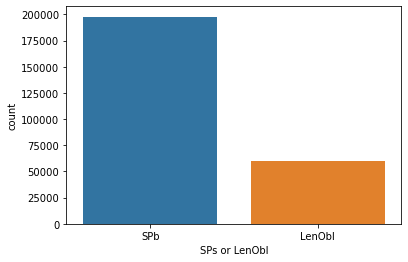

In [63]:
#by the way lets look at the distr of observations among these two locations (how many of observations will will delete?)
sns.countplot(sell_df['SPs or LenObl']);

In [64]:
sell_df=sell_df[sell_df['SPs or LenObl']=='SPb']

In [65]:
#for me it is more logical to look at mean and median of uncleaded data firts, lets do it
print("Rent median sell: {}".format(sell_df.last_price.median()))
print("Rent mean sell: {}".format(sell_df.last_price.mean()))

Rent median sell: 5300000.0
Rent mean sell: 8151204.698728967


Now for me these numbers looks ok and logical but I suppose that we will find some outlayers obviously. As I don't want to make e research about flats' costs, I will just analyze this dataset itself

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


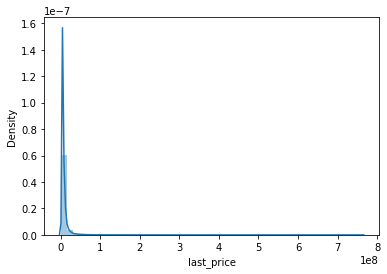

In [66]:
sns.distplot(sell_df.last_price);

Well, distribution seems for me good and logically right-skewed, but it is not very representative for outlayers

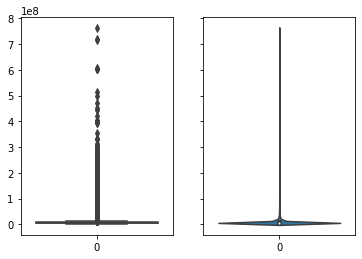

In [67]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=sell_df.last_price, ax=axes[0])
sns.violinplot(data=sell_df.last_price, ax=axes[1]);

Ok, now it is more representative. I can see really a lot of potential outlayers, maybe it is good to look at them in detais

In [68]:
sell_df[(sell_df.last_price >sell_df.last_price.quantile([0.95]).values[0])].describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id
count,9.890000e+03,9.890000e+03,9890.000000,9890.000000,9890.000000,8707.000000,8623.000000,968.000000,6897.000000,9890.0,9890.0,9.890000e+03
mean,4.944075e+18,4.463066e+07,5.809403,3.671385,169.988241,25.928459,91.470626,7.237437,2.451356,1.0,2.0,4.764054e+18
std,2.516238e+18,4.078412e+07,4.049968,1.601142,77.474292,15.846405,51.768661,24.510677,3.018263,0.0,0.0,2.717358e+18
min,7.830520e+05,2.042500e+07,1.000000,0.000000,15.000000,4.000000,3.000000,0.000000,0.000000,1.0,2.0,1.526483e+16
25%,3.259990e+18,2.481410e+07,3.000000,3.000000,122.000000,15.850000,59.300000,0.000000,0.000000,1.0,2.0,2.540069e+18
50%,5.283731e+18,3.098981e+07,5.000000,3.000000,153.000000,21.000000,80.000000,0.000000,1.000000,1.0,2.0,4.753304e+18
75%,6.456124e+18,4.890000e+07,7.000000,4.000000,195.000000,31.300000,109.000000,0.000000,4.000000,1.0,2.0,7.697764e+18
max,9.218741e+18,7.630000e+08,28.000000,22.000000,903.000000,174.000000,710.000000,100.000000,13.000000,1.0,2.0,9.214854e+18


Well mean price for extra expensive flats is 46 million, which quite high price but not impossible, as the flat of 98 million - that is possible (who these people are who can buy it??????) price. Average number of rooms is three with 169 meters of area. One again - that are adequate numbers for flats of such cost. As for me, we most possibly don't have here outlayers which were produced by number mistakes but I don't think that we can analyze these flats in the same dataset with cheaper flats as the price most possibly is infuenced by a little bit other variables more (for example, the area could be less impotant than address). My conclusion - I will exlude upper 5% of observations

In [69]:
sell_df[(sell_df.last_price <sell_df.last_price.quantile([0.05]).values[0])].describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id
count,9.518000e+03,9.518000e+03,9518.000000,9518.000000,9518.000000,4252.000000,7131.000000,591.000000,6279.000000,9518.0,9518.0,9.518000e+03
mean,4.824503e+18,2.320657e+06,6.250893,0.670204,30.040354,7.724038,17.534159,13.011860,3.632744,1.0,2.0,4.557271e+18
std,2.737838e+18,3.636828e+05,6.065411,0.722197,16.352094,2.990329,5.620802,33.469108,3.928217,0.0,0.0,2.642342e+18
min,9.362960e+05,1.900000e+04,1.000000,0.000000,10.000000,1.500000,2.000000,0.000000,0.000000,1.0,2.0,3.603962e+15
25%,2.493754e+18,2.120000e+06,2.000000,0.000000,24.000000,5.600000,15.020000,0.000000,0.000000,1.0,2.0,2.276805e+18
50%,5.176140e+18,2.435147e+06,4.000000,1.000000,28.400000,6.700000,17.000000,0.000000,3.000000,1.0,2.0,4.501383e+18
75%,7.075933e+18,2.600000e+06,9.000000,1.000000,32.400000,9.100000,18.450000,0.000000,6.000000,1.0,2.0,6.864802e+18
max,9.219206e+18,2.749500e+06,33.000000,8.000000,373.900000,32.000000,171.600000,100.000000,13.000000,1.0,2.0,9.215639e+18


As for the cheapest ones, everage price is 2 million which is absolutely okay but I don't believe in flat for 19000 for 39 sq meters. Maybe such deal really exists but I think that price was influenced by some extrime events so again we cannot really analyze it with all other more realistic observations. I will exclude all observations which are cheaper than 500'000 because these flats as the most expensive ones, were obviously infuenced by some unobserved events and most probably that we will not be able to predict such observations anyway 

In [70]:
#as for the sells I will work with 5 and 95% quantiles 
sell_df=sell_df[(sell_df.last_price < sell_df.last_price.quantile([0.95]).values[0])&(sell_df.last_price>=500000)]

In [71]:
sell_median_price = sell_df.last_price.median()
sell_mean_price = sell_df.last_price.mean()

print("Rent median sell: {}".format(sell_median_price))
print("Rent mean sell: {}".format(sell_mean_price))

Rent median sell: 5100000.0
Rent mean sell: 6231184.744120575


No I can see that median +- remains the same but mean changed more significant because of cleaning

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


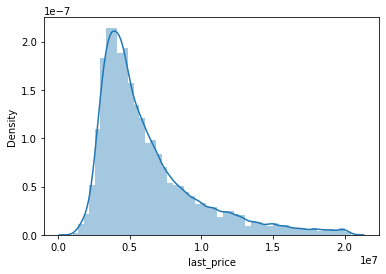

In [72]:
sns.distplot(sell_df.last_price);

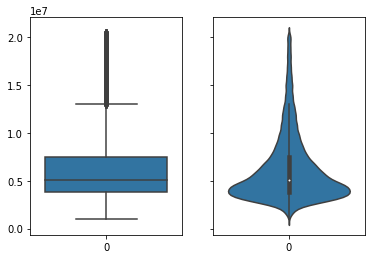

In [73]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=sell_df.last_price, ax=axes[0])
sns.violinplot(data=sell_df.last_price, ax=axes[1]);

In [74]:
sell_df[sell_df.last_price==np.max(sell_df.last_price)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,SPs or LenObl
65995,7546131713257063425,2016-05-27T00:00:00+03:00,2017-02-02T00:00:00+03:00,20420112.0,3,False,3,False,83.0,24.0,39.0,NaN,2.0,1,2,"Россия, Санкт-Петербург, Зеленогорск, Приморское шоссе, 502",2931792321285394932,SPb


In [75]:
sell_df[sell_df.last_price==np.min(sell_df.last_price)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,SPs or LenObl
246319,7858755684144958209,2017-11-19T00:00:00+03:00,2017-11-30T00:00:00+03:00,1000000.0,15,False,6,False,120.0,NaN,13.0,NaN,3.0,1,2,"Россия, Санкт-Петербург, Суздальский проспект, 61",9206393729702893221,SPb
265262,8474498451627136001,2017-12-21T00:00:00+03:00,2018-02-06T00:00:00+03:00,1000000.0,4,False,3,False,62.0,NaN,NaN,NaN,NaN,1,2,"Россия, Санкт-Петербург, Колпинский район, посёлок Металлострой, Полевая улица, 2/30",3898392989115707854,SPb


In [76]:
#work with price per sq meters and find max and min median price for house

In [77]:
sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area

In [78]:
house_sell_df = sell_df.groupby('unified_address').price_per_sq_m.median().reset_index()

In [79]:
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

In [80]:
house_sell_df[house_sell_df['house_price_sqm_median']==house_sell_df['house_price_sqm_median'].max()]

,unified_address,house_price_sqm_median
1208,"Россия, Санкт-Петербург, Антоновская улица, 3",1666666.5


In [81]:
house_sell_df[house_sell_df['house_price_sqm_median']==house_sell_df['house_price_sqm_median'].min()]

,unified_address,house_price_sqm_median
5802,"Россия, Санкт-Петербург, Конторская улица, 16",5000.0


The last question is to calculate number of years to cover expenses of buying flat and then giving a rent

In [82]:
sell_df=pd.merge(sell_df,house_rent_df_cleaned_spb,how='left',on='unified_address')

In [83]:
sell_df=sell_df.replace(np.nan,0)

In [84]:
len(sell_df[sell_df['house_price_sqm_median_cleaned']==0])/len(sell_df)

0.13499662056082726

In [85]:
sell_df['price_for_rent']=sell_df.area*sell_df['house_price_sqm_median_cleaned']

Well, 13% of houses don't have observations and information about rents so we cannot find the answer (maybe we can find the nearest house and suppose that the median price for this house will be similar with possible median price for the house without observations but I will not do it)

Not the most elegant solution, way be it is a good idea to think how work with matrixes here. In reality, results fully depend on r, I will use 5% inflation rate

In [86]:
def horizon_of_payback(price_for_rent,price_for_sell,r=0.05):
    if price_for_rent==0:
        return 'impossible'
    else:
        try:
            c=price_for_sell/(price_for_rent*12)
            n=0
            npv=1/((1+r)**n)
            while npv<c:
                n+=1
                npv=npv+1/((1+r)**n)
            return n
        except OverflowError:
            return 'impossible'


In [87]:
sell_df['years_for_payback']=list(map(horizon_of_payback,sell_df.price_for_rent,sell_df.last_price))

In [88]:
len(sell_df[sell_df['years_for_payback']=='impossible'])/len(sell_df)

0.18395857392988862

With given indlation rate 18% of houses are absolutely inefficient to buy flats in them and then give the rent for these flats

In [89]:
sell_df[(sell_df['years_for_payback']=='impossible')&(sell_df.price_for_rent!=0)].describe()

,offer_id,last_price,floor,rooms,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,building_id,price_per_sq_m,house_price_sqm_median_cleaned,price_for_rent
count,9.200000e+03,9.200000e+03,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.000000,9200.0,9200.0,9.200000e+03,9200.000000,9200.000000,9200.000000
mean,4.936988e+18,8.809885e+06,6.369130,1.912283,61.524513,10.725183,31.193010,1.251995,2.732174,1.0,2.0,4.386380e+18,141722.963413,495.878214,30770.469529
std,2.814060e+18,4.657990e+06,5.013976,0.974521,25.824871,7.442011,18.837592,11.034397,4.109017,0.0,0.0,2.740837e+18,45459.097909,138.204136,15791.250348
min,7.941350e+05,1.330000e+06,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.0,3.603962e+15,47746.478873,183.098592,4024.390244
25%,2.554639e+18,5.000000e+06,3.000000,1.000000,41.000000,7.500000,18.000000,0.000000,0.000000,1.0,2.0,1.943432e+18,113708.697171,413.151365,17990.911227
50%,5.176116e+18,7.600000e+06,5.000000,2.000000,57.500000,10.000000,30.000000,0.000000,0.000000,1.0,2.0,4.299641e+18,135000.000000,488.520874,26894.273443
75%,7.340091e+18,1.200000e+07,9.000000,3.000000,78.800000,13.400000,43.000000,0.000000,5.000000,1.0,2.0,6.742036e+18,160000.000000,562.500000,41767.892085
max,9.218065e+18,2.041119e+07,36.000000,6.000000,200.000000,71.000000,147.200000,100.000000,13.000000,1.0,2.0,9.217640e+18,797916.666667,1222.222222,79333.333333


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


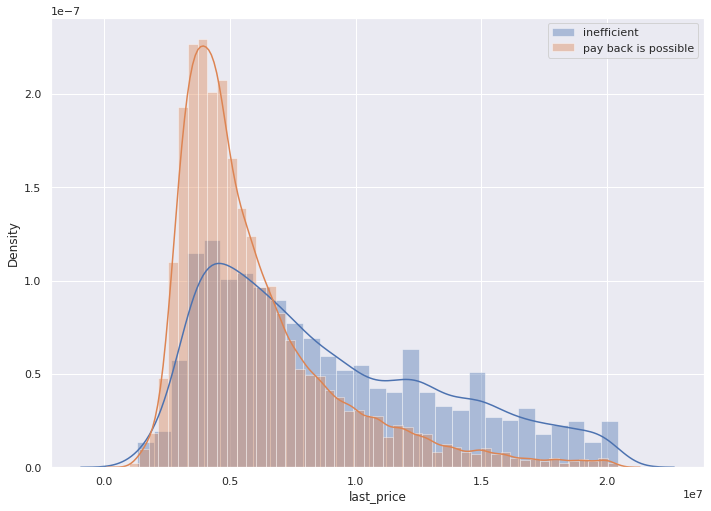

In [90]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(sell_df[(sell_df['years_for_payback']=='impossible')&(sell_df.price_for_rent!=0)].last_price, label='inefficient');
sns.distplot(sell_df[(sell_df['years_for_payback']!='impossible')].last_price,label='pay back is possible')
plt.legend()

From the graph above we can see significant portion of quite expensive flats which should not be bought for rent (and it is guite logical) but the vast majority of flats has +- the same price as those which we can buy for rent


But


If it is possible to calculate years it is absolutely not necessary that we will even alive at the moment of full payback. Lets look at it

In [91]:
payback=sell_df[(sell_df['years_for_payback']!='impossible')]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

mean year for payback but with max of 40 years is  24.466295911507668


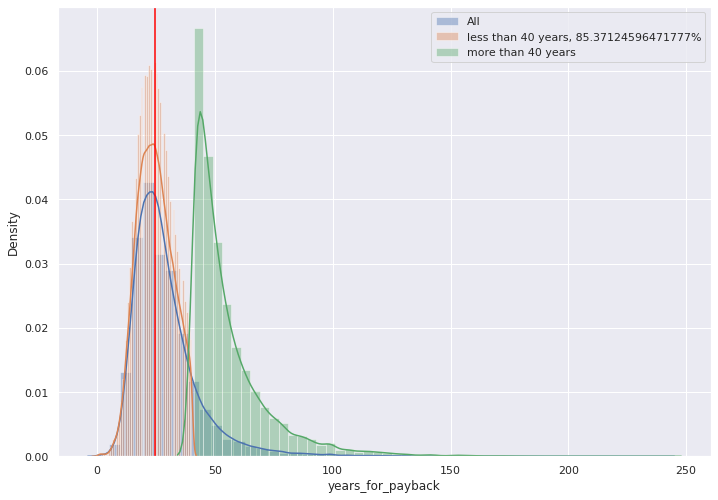

In [92]:

sns.distplot(payback['years_for_payback'],label='All')
sns.distplot(payback[payback['years_for_payback']<=40]['years_for_payback'],label='less than 40 years, '+str(len(payback[payback['years_for_payback']<=40]['years_for_payback'])/len(payback)*100)+'%');
sns.distplot(payback[payback['years_for_payback']>40]['years_for_payback'],label='more than 40 years');
plt.axvline(payback[payback['years_for_payback']<=40]['years_for_payback'].mean(),color='red')
plt.legend()
print('mean year for payback but with max of 40 years is ',payback[payback['years_for_payback']<=40]['years_for_payback'].mean())

Well, now we see that in reality, most of flats which are even possible to be calculated are also possible to be paid back in +- 24 years

Lets look at the most efficient flats according to the years for payback

In [93]:
payback.sort_values('years_for_payback',ascending=True).head(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,SPs or LenObl,price_per_sq_m,house_price_sqm_median_cleaned,price_for_rent,years_for_payback
157383,7684699700069001217,2018-05-03T00:00:00+03:00,2018-06-21T00:00:00+03:00,1800000.0,3,False,7,False,300.0,26.0,28.0,0.0,3.0,1,2,"Россия, Санкт-Петербург, проспект Римского-Корсакова, 8/18",4835589773239616396,SPb,6000.000000,678.651059,203595.317726,0
27256,4220407888640965888,2016-03-10T00:00:00+03:00,2016-03-14T00:00:00+03:00,1600000.0,7,False,5,False,260.0,27.0,24.5,0.0,8.0,1,2,"Россия, Санкт-Петербург, набережная канала Грибоедова, 148-150",1438417409711186455,SPb,6153.846154,725.935829,188743.315508,0
67738,3469860324636796673,2017-01-18T00:00:00+03:00,2017-02-09T00:00:00+03:00,1800000.0,3,False,6,False,212.0,18.0,22.0,0.0,0.0,1,2,"Россия, Санкт-Петербург, Невский проспект, 136",2892335032057220990,SPb,8490.566038,1120.000000,237440.000000,0
2800,5028522700596232011,2015-05-01T00:00:00+03:00,2016-08-03T00:00:00+03:00,1440000.0,3,False,8,False,224.6,17.9,13.2,0.0,0.0,1,2,"Россия, Санкт-Петербург, Гагаринская улица, 25",622550191830777612,SPb,6411.398041,824.528302,185189.056604,0
48558,3528445278440227584,2016-09-02T00:00:00+03:00,2016-10-17T00:00:00+03:00,1400000.0,4,False,3,False,280.0,25.0,18.0,0.0,0.0,1,2,"Россия, Санкт-Петербург, Лиговский проспект, 44А",2861706125080801998,SPb,5000.000000,732.286634,205040.257649,0
45856,4332292566755429889,2016-08-07T00:00:00+03:00,2016-09-21T00:00:00+03:00,1200000.0,5,False,5,False,175.0,15.5,14.2,0.0,3.0,1,2,"Россия, Санкт-Петербург, Боровая улица, 18/1",5241676004767914301,SPb,6857.142857,644.444444,112777.777778,0
109381,6108387771741000192,2017-10-13T00:00:00+03:00,2017-10-16T00:00:00+03:00,1450000.0,2,False,6,False,167.2,12.5,16.2,0.0,3.0,1,2,"Россия, Санкт-Петербург, Троицкий проспект, 16",6956466604845942846,SPb,8672.248804,1080.208333,180610.833333,0
119891,2010102731286901249,2017-11-26T00:00:00+03:00,2018-02-07T00:00:00+03:00,11700000.0,3,False,4,False,1000.0,10.0,98.0,0.0,7.0,1,2,"Россия, Санкт-Петербург, Дивенская улица, 18/16",1221594982995908689,SPb,11700.000000,786.538462,786538.461538,1
95176,5297138280423399169,2017-07-20T00:00:00+03:00,2017-10-11T00:00:00+03:00,4140000.0,14,False,2,False,594.0,11.5,32.2,0.0,2.0,1,2,"Россия, Санкт-Петербург, Русановская улица, 19к3",6563554046625816166,SPb,6969.696970,524.479167,311540.625000,1
37415,2040641616563826176,2016-05-23T00:00:00+03:00,2016-06-15T00:00:00+03:00,4200000.0,5,False,1,False,431.0,11.0,18.0,0.0,10.0,1,2,"Россия, Санкт-Петербург, посёлок Парголово, улица Михаила Дудина, 23к1",4661483057276825143,SPb,9744.779582,492.500000,212267.500000,1


We can see that the most effective ones are expensive flats in luxury districts of the city

#### Россия, Санкт-Петербург, проспект Римского-Корсакова, 8/18	
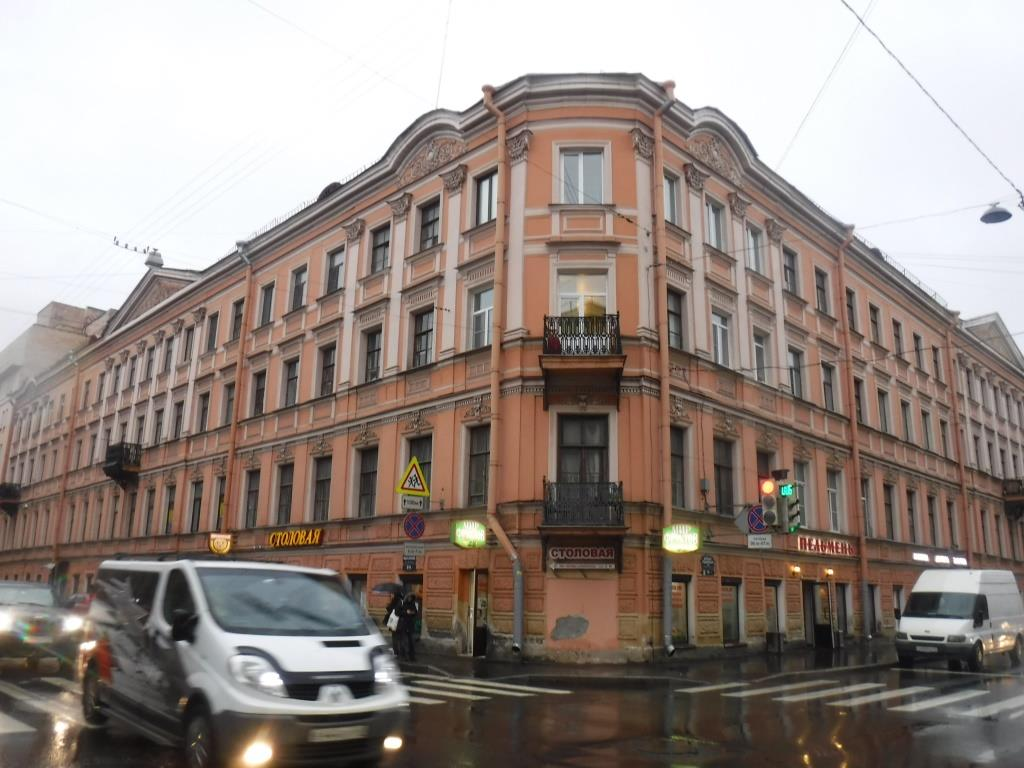

### IT IS PICTURES TIME!!!!

Well, now I wonna add some additional visualizations of sell's dataset
I will not explain each graph (even if I will see smth REALLY intresting for me)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


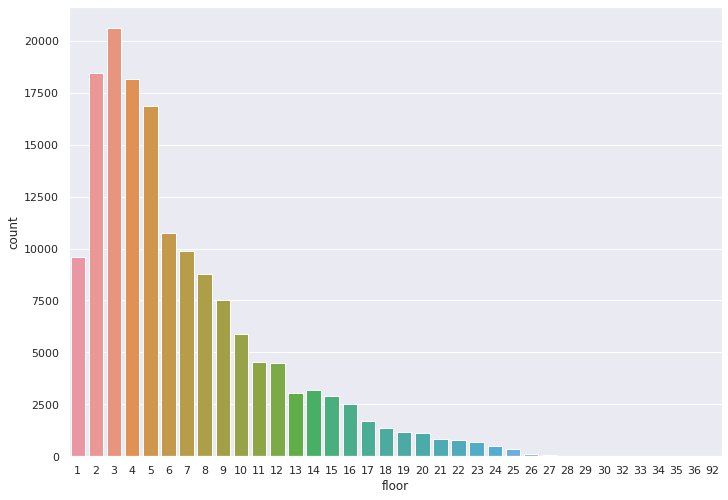

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


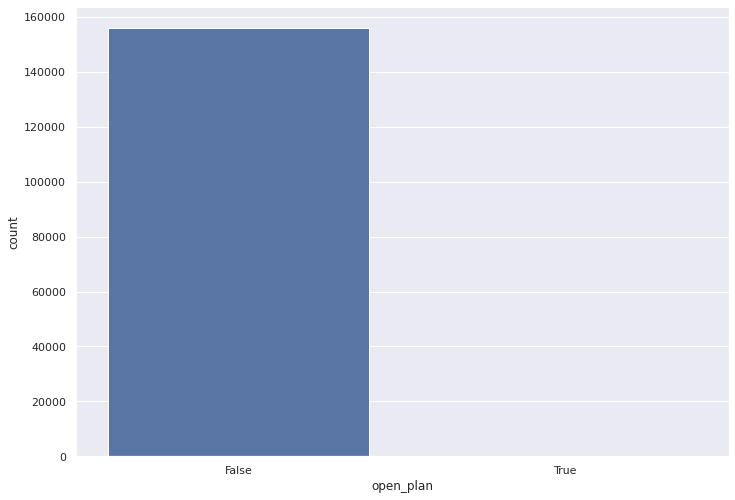

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


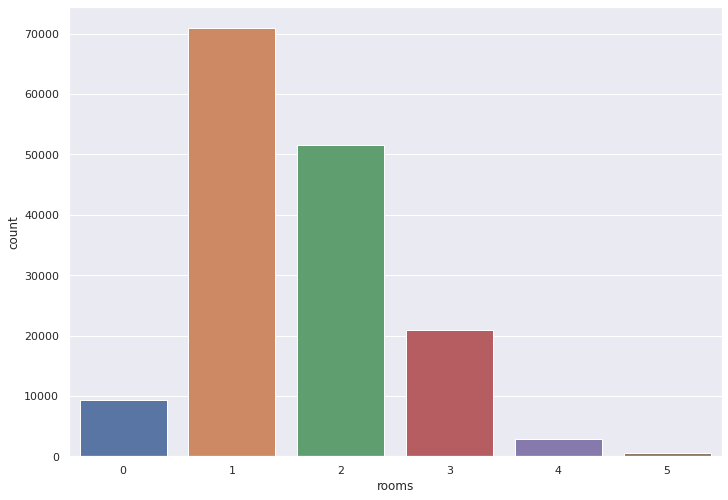

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


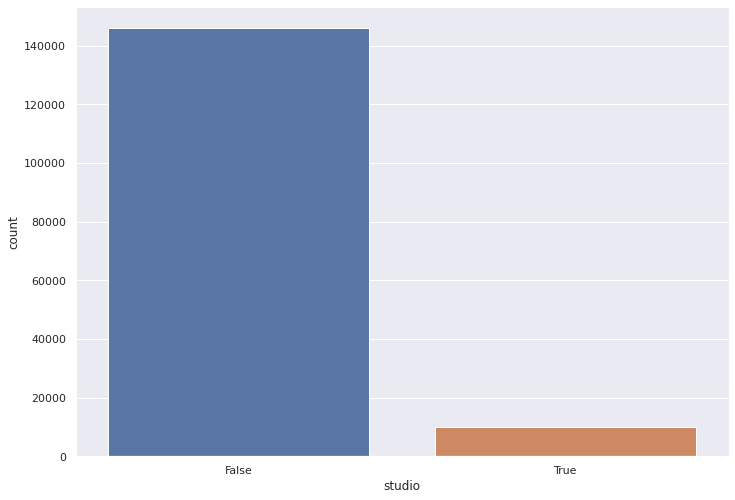

In [94]:
intrestin_conditions_about_flats=['floor', 'open_plan', 'rooms', 'studio']
for condition in intrestin_conditions_about_flats:
    sns.countplot(rent_df_cleaned_spb[condition])
    plt.show()


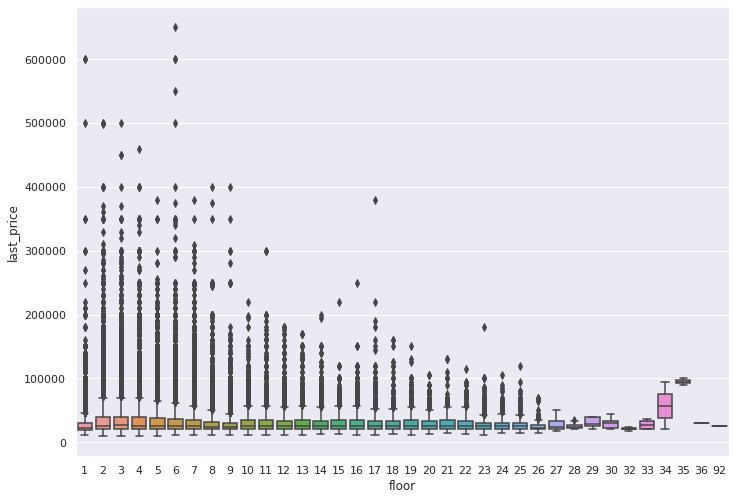

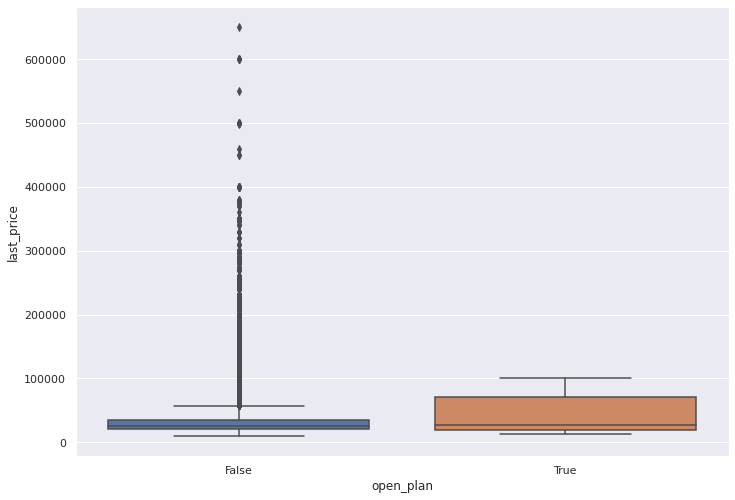

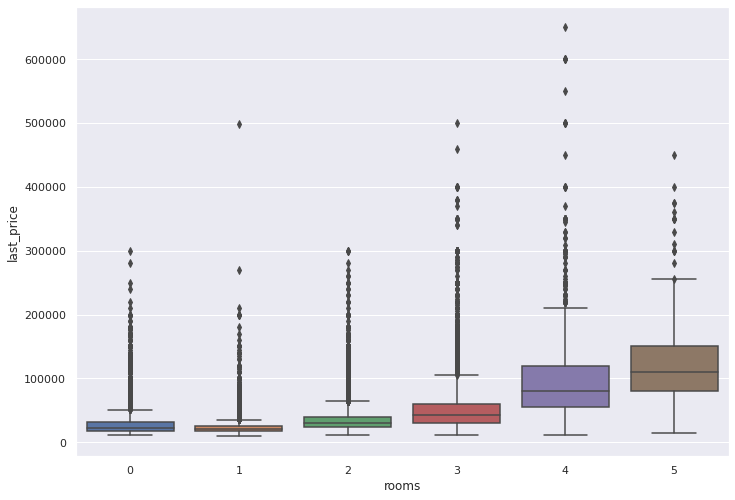

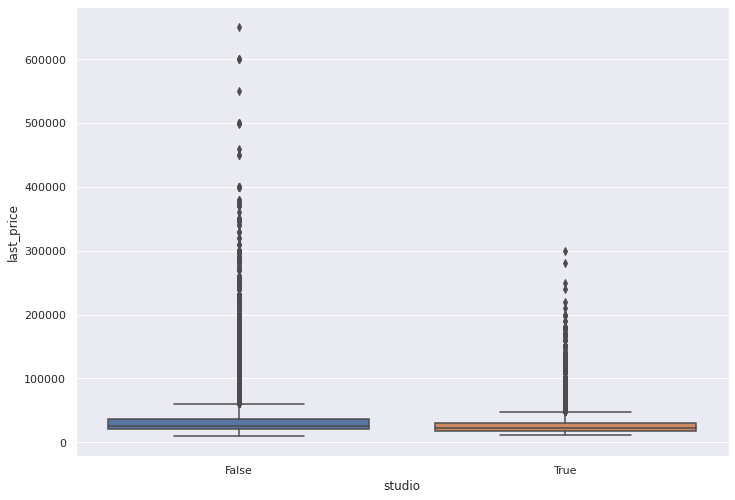

In [95]:
for condition in intrestin_conditions_about_flats:
    sns.boxplot(x=condition, y = 'last_price', data= rent_df_cleaned_spb)
    plt.show()

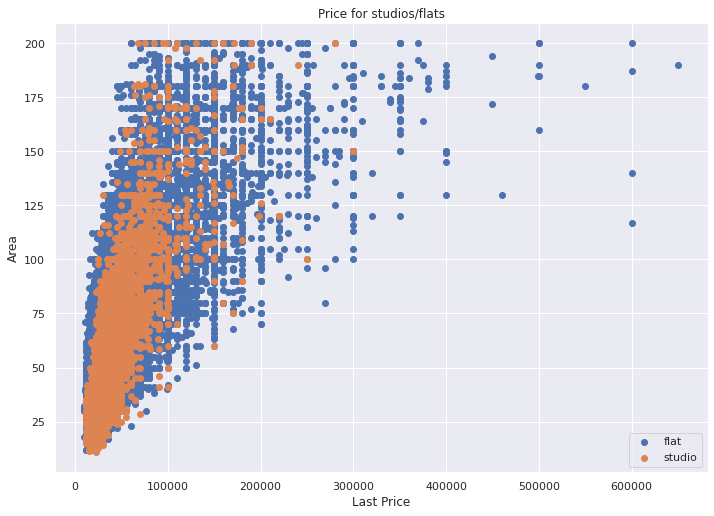

In [96]:

plt.scatter(rent_df_cleaned_spb[~rent_df_cleaned_spb['studio']]['last_price'], rent_df_cleaned_spb[~rent_df_cleaned_spb['studio']]['area'], label = 'flat');
plt.scatter(rent_df_cleaned_spb[rent_df_cleaned_spb['studio']]['last_price'], rent_df_cleaned_spb[rent_df_cleaned_spb['studio']]['area'], label= 'studio');
# set xlabel for figure
plt.xlabel('Last Price');
# set y label for figure
plt.ylabel('Area');
#set figure title
plt.title('Price for studios/flats')
# add legend to plot
plt.legend();

In [97]:
from datetime import datetime
sell_df['last_day_exposition']=list(map(lambda x: datetime.strptime(x[:10],'%Y-%m-%d'),sell_df['last_day_exposition']))

In [98]:
sell_df['first_day_exposition']=list(map(lambda x: datetime.strptime(x[:10],'%Y-%m-%d'),sell_df['first_day_exposition']))
sell_df['days_exposition']=sell_df['last_day_exposition']-sell_df['first_day_exposition']
sell_df['days_exposition']=list(map(lambda x: int(str(x).split(' ')[0]),sell_df['days_exposition']))

In [99]:
nominal_features=['category_type','renovation']
numeric_features= ['last_price',
 'floor',
 'rooms',
 'area',
 'kitchen_area',
 'living_area',
 'agent_fee',
 'price_per_sq_m',
 'house_price_sqm_median_cleaned',
 'days_exposition','price_for_rent','years_for_payback']

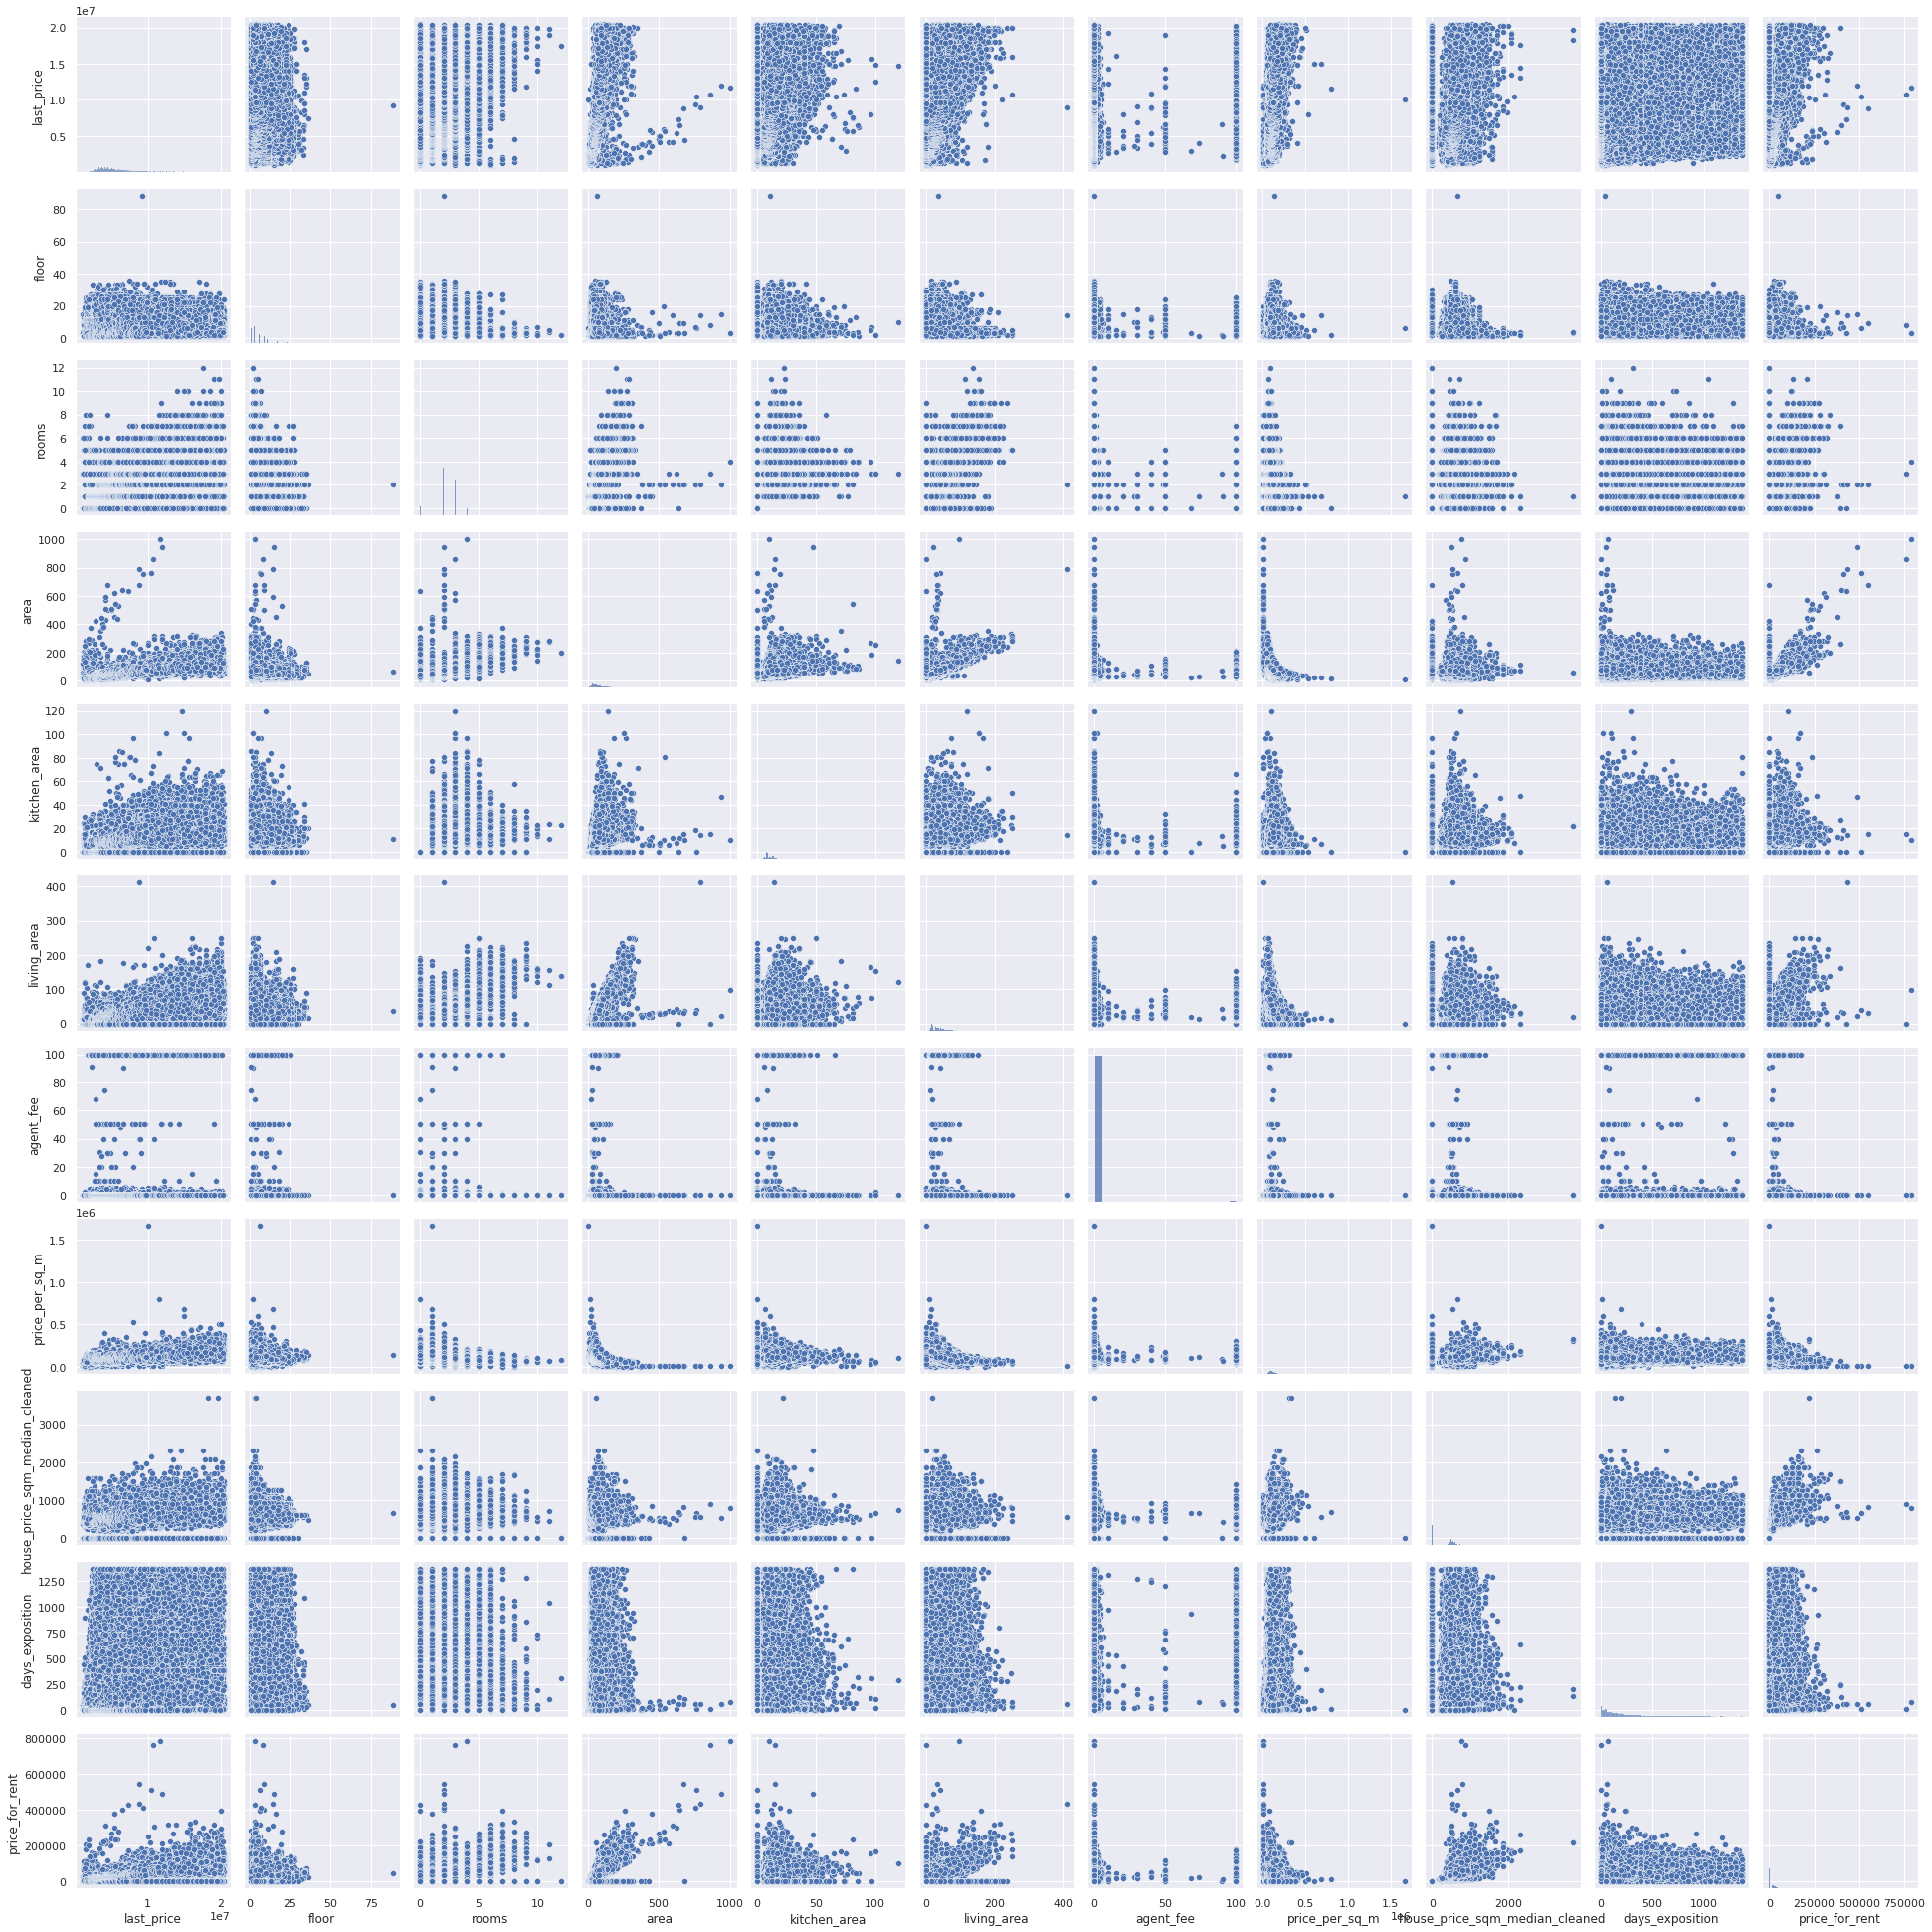

In [100]:
sns.pairplot(sell_df[numeric_features])

Complitely uncomfortable to read the graph above, but we can briefly look at the whole picture and maybe find something intresting to analyze it later

<AxesSubplot:>

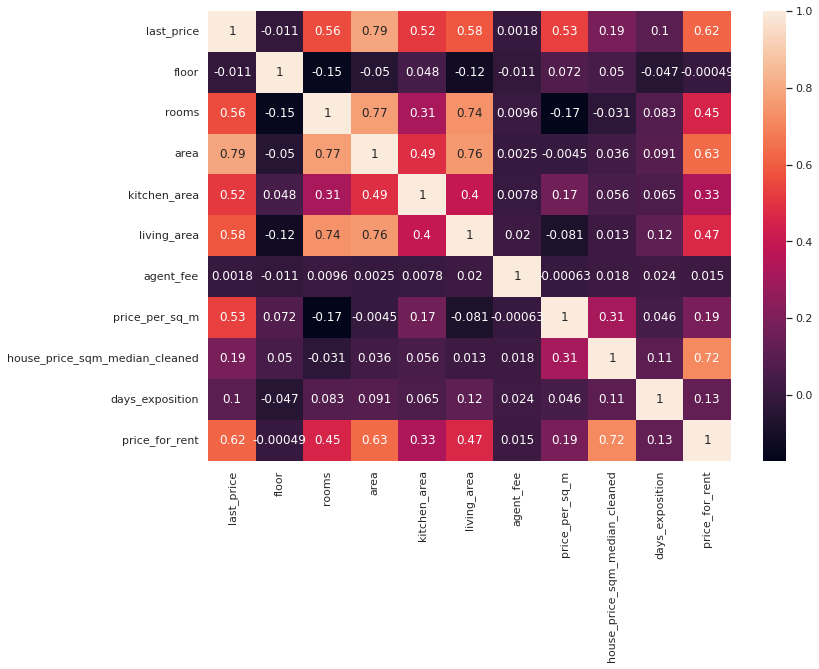

In [101]:
sns.heatmap(sell_df[numeric_features].corr(),annot=True)

In [ ]:
sell_df.to_csv('sells_result.csv',sep=',')